# Business Development: Cancellation Prediction
### Created By : Regi Dwi Darmawan

***BACKGROUND***
---
**Blue Window** adalah perusahaan penyedia layanan pemesanan hotel berbasis digital dan On-The-Spot asal Portugal yang berdiri untuk menjawab tantangan dalam industri pariwisata modern. Seiring meningkatnya kebutuhan perjalanan wisata maupun bisnis, konsumen menuntut akses yang lebih cepat, mudah, dan transparan terhadap informasi akomodasi. Blue Window hadir dengan menawarkan solusi melalui platform digital yang memungkinkan pelanggan untuk membandingkan harga, meninjau ulasan, serta melakukan pemesanan hotel secara real-time.

Business Development Department hendak melakukan prediksi customer yang melakukan cancel agar dapat memitigasi resiko yang timbul akibat cancel dari customer.

Target :

1 : Transaksi di cancel

0 : Transaksi tidak di cancel


***Problem Statement***
---
1. Apakah pembatalan bookingan yang dilakukan oleh customer dapat di prediksi?
2. Bagaimana cara perusahaan memitigasi resiko yang timbul akibat pembatalan bookingan?


***Goals***
---
Tujuan utamanya adalah membuat perhitungan yang akurat mengenai prediksi cancel bookingan agar dapat membuat langkah yang tepat untuk mitigasi resiko yang ada.

***Analytic Approach***
---
Hal pertama yang akan  dilakukan adalah menganalisis data untuk menemukan pola customer yang melakukan cancel bookingan.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas apakah customer ini akan membatalkan bookingan atau tidak.

**Metric Evaluation**

Type 1 error : False Positive  
Konsekuensi: Sudah melakukan mitigasi resiko tentang pembatalan bookingan yang dimana akan sedikit mempersulit customer dan berkemungkinan tidak senang akan pelayanan yang diberikan.

Type 2 error : False Negative  
Konsekuensi: kehilangan profit langusung maupun tidak langsung dan menimbulkan cost administrasi yang sudah dilakukan saat melakukan pembookingan maupun pada saat pembatalan.

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi cost yang timbul akibat error pada False Negative dan melakukan mitigasi pada False Postive.

***LOAD DATA DAN IMPORT LIBRARY***
---

In [2]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split
from sklearn.model_selection import train_test_split

#column Transformer
from sklearn.compose import ColumnTransformer

# Preprocessing
## imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
## encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

## scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

# model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# scoring
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#y-data profiling
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

# Imbalance learn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import RFE

# Joblib untuk save model
import joblib

# Hyper OPT
from hyperopt import hp, tpe, Trials, STATUS_OK, space_eval, fmin, STATUS_FAIL
from hyperopt.pyll import scope

# Shap
import shap
%matplotlib inline



In [3]:
df = pd.read_csv("C:\\Users\\regid\\OneDrive\\Documents\\Capstone\\CAPSTONE 3\\FIX\\data_hotel_booking_demand.csv")

In [5]:
df[df['market_segment']=='Direct']

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
5,ESP,Direct,0,1,No Deposit,0,Transient-Party,A,0,1,0
15,LUX,Direct,0,0,No Deposit,0,Transient,D,1,0,0
33,PRT,Direct,0,0,No Deposit,0,Transient,A,0,0,0
48,ESP,Direct,0,0,No Deposit,0,Transient,E,0,2,0
81,PRT,Direct,0,1,No Deposit,0,Transient-Party,E,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83508,GBR,Direct,0,0,No Deposit,0,Transient,A,0,0,0
83515,GBR,Direct,0,2,No Deposit,0,Transient-Party,A,1,1,0
83540,GBR,Direct,0,0,No Deposit,0,Transient,D,1,0,0
83546,FRA,Direct,0,0,No Deposit,0,Transient,D,0,0,0


In [3]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


***Data Understanding***
---

## Penjelasan Kolom

| Column Name                 | Description                                                                 | Data Type  |
|------------------------------|-----------------------------------------------------------------------------|--------|
| country                      | Country of origin.                                                          | object |
| market_segment               | Market segment designation.                                                 | object |
| previous_cancellations       | Number of previous bookings that were cancelled by the customer prior to the current booking. | int64  |
| booking_changes              | Number of changes/amendments made to the booking from creation until check-in or cancellation. | int64  |
| deposit_type                 | Indication on if the customer made a deposit to guarantee the booking.      | object |
| days_in_waiting_list         | Number of days the booking was in the waiting list before confirmation.     | int64  |
| customer_type                | Type of booking.                                                            | object |
| reserved_room_type           | Code of room type reserved (anonymized).                                    | object |
| required_car_parking_spaces  | Number of car parking spaces required by the customer.                      | int64  |
| total_of_special_requests    | Number of special requests (e.g., twin bed, high floor).                    | int64  |
| is_canceled                  | Value indicating if the booking was canceled (1) or not (0).                | int64  |



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


- Terdapat 83573 row data
- terdapat 11 columns
- Tipe data yang tersemat ada 2 jenis yakni int64 dan object

In [5]:
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

memiliki 351 data missing value

In [6]:
df.duplicated().sum()

73371

tidak bisa dikatakan duplikat karena tidak teradapatnya ID (Customer ID) pada data, bisa jadi memang data pemesanan mirip bahkan sama.

In [7]:

profile = ProfileReport(df, title="Capstone III")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 85.22it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## DATA PROFILE

- Memiliki 11 kolom.
- Memiliki 83573 row.
- Memiliki 351 Missing Values.
- Memiliki 4 kolom dengan tipe data Numeric dan 7 kolom dengan tipe data categorical.


**Kolom country**

- Memiliki 351 missing values.
- Memiliki 162 unique values.


**Kolom market_segment**

- Memiliki 8 unique values. 


**Kolom previous_cacellations**

- Memiliki 15 unique values.
- Didominasi oleh 0 (tidak pernah melakukan pembatalan sebelumnya) sebanyak 94.6%


**Kolom booking_changes**

- Memiliki 19 unique values.
- Didominasi oleh 0 (tidak pernah melakukan perubahan booking) sebanyak 84.8%


**Kolom deposit_type**

- Memiliki 3 unique values.
- Didominasi oleh No Deposit (tidak memakai dp/uang pengikat) sebanyak 87.7%


**Kolom days_in_waitinglist**

- Memiliki 115 unique values.
- Didominasi oleh 0 (kamar yang dibooking terkonfirmasi tersedia pada hari yang sama) sebanyak 96.9%


**Kolom customer_type**

- Memiliki 4 unique values.
- Didominasi oleh tipe Transient (perorangan) sebanyak 75%


**Kolom reserved_room_type**

- Memiliki 10 unique values.
- Didominasi oleh tipe kamar A sebanyak 71.8%


**Kolom required_car_parking_spaces**

- Memiliki 5 unique values.
- Didominasi oleh 0 (tidak melakukan request lahan parkir) sebanyak 93.7%


**Kolom total_of_special_requests**

- Memiliki 6 unique values.
- Didominasi oleh 0 (tidak mengajukan special request) sebanyak 58.9%

**Kolom is_canceled**

- Memiliki 2 unique values.
- Didominasi oleh 0 (tidak melakukan pembatalan) sebanyak 64%

## Cost Matrix

- **Introduction**: 
- Dalam banyak permasalahan machine learning di dunia nyata, kelas positif (yang menjadi fokus) biasanya hanya mewakili proporsi yang jauh lebih kecil dari total dataset.

- Ketidakseimbangan ini bisa berkisar dari ringan (misalnya, 40% positif) hingga sangat ekstrem (misalnya, 0,1% positif), sehingga metrik seperti akurasi dapat menjadi menyesatkan.

- **Target Variable**: `is_canceled` - Binary classification mengindikasikan apakah customer melakukan pembatalan atau tidak.
- **Class Distribution**: Imbalanced dataset dengan sekitar 37% data menunjukan customer melakukan pembatalan.


- **Source**:
  - “Commission that doesn't come back. Many OTAs or resellers don't refund their commission or booking fee, even if the customer gets a full refund.” palisis.com
  - Komisi standar sebesar 15–25%, plus biaya tambahan seperti marketing boosts (2–5%) dan payment processing (1.5–3%), sehingga total bisa jauh lebih tinggi switchhotelsolutions.com.au



- **Cost and Benefit**: 
  - Asumsi nilai perbookingan : $100
  - Komisi dasar : 25% ($25)
  - Marketing Boost (Pemberian voucher untuk bookingan selanjutnya agar tidak cancel) : 3% ($3)
  - Payment Processing : 2% ($2)
  - Potensi Pendapatan Lain Terlewat: Cancel booking berarti hilangnya kesempatan revenue dari layanan tambahan seperti restoran, spa, parkir, dll ($10)


| Actual \ Predicted | Predicted Cancel | Predicted No Cancel |
|-------------------|-----------------|-------------------|
| **Actual Cancel** | **True Positive (TP)**<br><br>• <span style="color:Green">Benefit: **+$10**</span><br><br>• Biaya sudah keluar untuk marketing dan proses administrasi (-$5)<br><br>• Dapat diintervensi dengan tidak dapat melakukan full refund dan komisi dapat tetap dipetik (+$25)<br><br>• Kehilangan potensi pendapatan (-$10) | **False Negative (FN)**<br><br>• <span style="color:red">Cost: **-$37**</span><br><br>• Kehilangan komisi karena tidak dapat diintervensi (-$25) <br><br>• Biaya administrasi sudah keluar (-$2)<br><br>• Kehilangan potensi pendapatan (-$10)|
| **Actual No Cancel** | **False Positive (FP)**<br><br>• <span style="color:Green">Benefit: **+$30**</span><br><br>• Biaya marketing dan administrasi (-$5)<br><br>• Potensi pendapatan ($10)<br><br>• Komisi dasar ($25) | **True Negative (TN)**<br><br>• <span style="color:Green">Benefit: **+$35**</span><br><br>• Komisi dasar ($25)<br><br>• Potensi pendapatan ($10) |


- **Accuracy Formula**: 

    Where:
  - $TP$ = $\text{True Positives}$

  - $TN$ = $\text{True Negatives}$

  - $FP$ = $\text{False Positives}$

  - $FN$ = $\text{False Negatives}$

- **Business Context**: 

  - Mempertimbangkan sebuah sistem yang dapat mendeteksi customer yang melakukan pembatalan.

  - Company harus bisa mendeteksi kasus ini agar dapat melakukan mitigasi dengan baik

  - Hasil diharapkan dapat mendatangkan benefit sebesar-besarnya dengan cost seminim mungkin
  

Berdasarkan perkiraan biaya di atas, dapat disimpulkan bahwasannya FN satu satunya yang memiliki kerugian, namun demikian biaya pendapatan FP lebih kecil dari TN. Oleh karena itu, metric yang digunakan pada model kali ini adalah F2 Score (Fokus pada penyeimbangan namun dibebankan lebih tinggi pada recall).

In [8]:
# define cost and benefit
tp_cost = 10
fn_cost = -37
fp_cost = 30
tn_cost = 35

## Data Cleaning

Ada data yang hilang/kosong pada column country, Karena Missing value hanya 351 data < 0.01% maka data didrop (hapus) agar kemurnian data dapat terjaga

In [9]:
# Melakukan Drop Missing Value
df.dropna(inplace=True)

Outlier yang akan kita hapus yaitu pada kolom `required_car_parking_spaces`, di mana row value 3 hanya terdiri dari 1 row dan row value 8 memiliki jarak yang cukup jauh dari sebelumnya dan hanya memiliki 2 rows.

In [10]:
df = df[df.required_car_parking_spaces != 3]
df = df[df.required_car_parking_spaces != 8]

In [11]:
# Melihat proporsi pesebaran data cancel
df['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.630709
1    0.369291
Name: proportion, dtype: float64

Terjadi imbalance antara cancel (1) sebesar 37% dan tidak cancel (0) sebesar 63%

In [12]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,0,0.0,162,"[PER, HRV]"
1,market_segment,object,0,0.0,8,"[Complementary, Undefined]"
2,previous_cancellations,int64,0,0.0,15,"[1, 13]"
3,booking_changes,int64,0,0.0,19,"[7, 21]"
4,deposit_type,object,0,0.0,3,"[Refundable, Non Refund]"
5,days_in_waiting_list,int64,0,0.0,115,"[40, 379]"
6,customer_type,object,0,0.0,4,"[Transient, Contract]"
7,reserved_room_type,object,0,0.0,10,"[G, H]"
8,required_car_parking_spaces,int64,0,0.0,3,"[0, 2]"
9,total_of_special_requests,int64,0,0.0,6,"[5, 3]"


Data sudah bersih dan siap di olah

## EDA

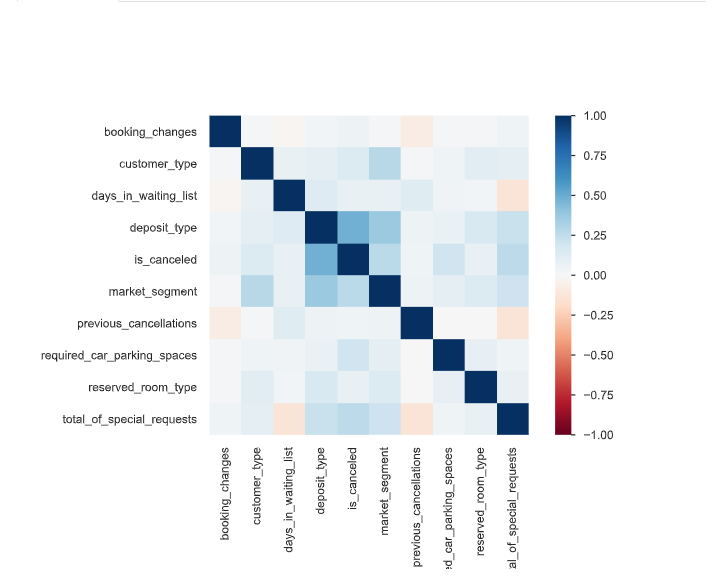

Dari gambar diatas (Sumber dari data y-profiling bagian heatmap correlation) yang menunjukan korelasi cukup kuat pada kolom `is_canceled` hanyalah kolom `deposit_type`

**Tabel korelasi**

|                          | booking_changes | customer_type | days_in_waiting_list | deposit_type | is_canceled | market_segment | previous_cancellations | required_car_parking_spaces | reserved_room_type | total_of_special_requests |
|--------------------------|-----------------|---------------|----------------------|--------------|-------------|----------------|-------------------------|-----------------------------|--------------------|---------------------------|
| **booking_changes**      | 1.000           | 0.023         | -0.017               | 0.028        | 0.050       | 0.019          | -0.073                  | 0.017                       | 0.013              | 0.044                     |
| **customer_type**        | 0.023           | 1.000         | 0.077                | 0.098        | 0.133       | 0.275          | 0.008                   | 0.042                       | 0.110              | 0.097                     |
| **days_in_waiting_list** | -0.017          | 0.077         | 1.000                | 0.129        | 0.070       | 0.078          | 0.120                   | 0.038                       | 0.028              | -0.125                    |
| **deposit_type**         | 0.028           | 0.098         | 0.129                | 1.000        | 0.481       | 0.375          | 0.049                   | 0.067                       | 0.151              | 0.220                     |
| **is_canceled**          | 0.050           | 0.133         | 0.070                | 0.481        | 1.000       | 0.270          | 0.043                   | 0.197                       | 0.075              | 0.265                     |
| **market_segment**       | 0.019           | 0.275         | 0.078                | 0.375        | 0.270       | 1.000          | 0.050                   | 0.093                       | 0.138              | 0.209                     |
| **previous_cancellations** | -0.073        | 0.008         | 0.120                | 0.049        | 0.043       | 0.050          | 1.000                   | 0.000                       | 0.004              | -0.128                    |
| **required_car_parking_spaces** | 0.017    | 0.042         | 0.038                | 0.067        | 0.197       | 0.093          | 0.000                   | 1.000                       | 0.079              | 0.044                     |
| **reserved_room_type**   | 0.013           | 0.110         | 0.028                | 0.151        | 0.075       | 0.138          | 0.004                   | 0.079                       | 1.000              | 0.077                     |
| **total_of_special_requests** | 0.044      | 0.097         | -0.125               | 0.220        | 0.265       | 0.209          | -0.128                  | 0.044                       | 0.077              | 1.000                     |



yang berkorelasi dengan kolom is_canceled dengan kuat hanyalah `is_canceled` dengan angka 0.481 ada juga yang memiliki korelasi namun terbilang rendah yakni `market_segment` dengan 0.27 dan `total_of_special_request` dengan 0.2

In [13]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [14]:
pd.crosstab(df['reserved_room_type'], df['is_canceled'], normalize=0).sort_values(by=1)

is_canceled,0,1
reserved_room_type,,
E,0.707945,0.292055
F,0.701772,0.298228
D,0.683969,0.316031
C,0.683036,0.316964
B,0.675985,0.324015
L,0.666667,0.333333
G,0.639082,0.360918
A,0.609170,0.390830
H,0.593516,0.406484


Room Type yang paling banyak dibatalkan ialah room type `P` dan yang paling sedikit dibatalkan ialah room type `E`

In [15]:
pd.crosstab(df['deposit_type'], df['is_canceled'], normalize=0).sort_values(ascending=False, by=1)

is_canceled,0,1
deposit_type,,
Non Refund,0.006238,0.993762
No Deposit,0.716857,0.283143
Refundable,0.790909,0.209091


Tipe deposit Non-Refund yang melakukan cancel ada 99.4% dan tipe deposit Refundable ada 20%

In [16]:
pd.crosstab(df['country'], df['is_canceled']).sort_values(ascending=False, by=1)

is_canceled,0,1
country,,
PRT,14940,19157
GBR,6771,1724
ESP,4449,1546
FRA,5941,1366
ITA,1723,935
...,...,...
CYM,1,0
CUB,4,0
SLE,1,0


Wisatawan lokal `PRT` paling sering melakukan pembatalan

In [17]:
pd.crosstab(df['customer_type'], df['is_canceled'], normalize=0).sort_values(ascending=False, by=1)

is_canceled,0,1
customer_type,,
Transient,0.594146,0.405854
Contract,0.692922,0.307078
Transient-Party,0.744287,0.255713
Group,0.904535,0.095465


Pembatalan paling sering dilakukan oleh `Transient` atau perorangan

In [18]:
pd.crosstab(df['market_segment'], df['is_canceled']).sort_values(ascending=False, by=1)

is_canceled,0,1
market_segment,,
Online TA,24974,14433
Groups,5306,8412
Offline TA/TO,11214,5766
Direct,7435,1339
Corporate,2990,678
Complementary,438,68
Aviation,130,35
Undefined,0,1


`Online TA` (Travel Agencies) paling banyak melakukan pembatalan namun demikian secara presentase `Groups` paling banyak melakukan pembatalan

In [19]:
pd.crosstab(df['days_in_waiting_list'], df['is_canceled']).sort_values(ascending=False, by=1)

is_canceled,0,1
days_in_waiting_list,,
0,51564,29071
39,0,166
31,1,92
44,20,73
46,1,65
...,...,...
58,104,0
65,23,0
36,1,0


Pembatalan paling sering terjadi pada pemesanan yang langsung terkonfirmasi (tanpa waiting list) oleh pihak hotel.

## Data Preparation 

In [20]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.
Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `reserved_room_type` menjadi Ordinal Encoding berdasrakan kolom `is_canceled` dengan format angka 1 adalah type room yang paling banyak dibatalkan dan seterusnya.
2. Merubah kolom kategorikal yang memiliki unique values >4 menjadi numeric dengan Binary Encoding agar output tidak terlalu banyak.
3. Merubah kolom katgorikal yang memiliki unique values <=4 menjadi numeric dengan One Hot Encoding karena kolom tidak memiliki urutan/ordinal dan memiliki uniqe values yang terbilang sedikit.
4. Melakukan scaling pada kolom numerical dengan robust scaler karena lebih tahan pada data yang tidak terdistribusi dengan normal dan outlier.

In [21]:
pd.crosstab(df['reserved_room_type'], df['is_canceled'], normalize=0).sort_values(by=1)

is_canceled,0,1
reserved_room_type,,
E,0.707945,0.292055
F,0.701772,0.298228
D,0.683969,0.316031
C,0.683036,0.316964
B,0.675985,0.324015
L,0.666667,0.333333
G,0.639082,0.360918
A,0.609170,0.390830
H,0.593516,0.406484


In [22]:
ordinal_mapping = [
    {'col':'reserved_room_type',
    'mapping':{
        'P'      :    1,
        'H'       :    2, 
        'A'       :    3, 
        'G'       :    4, 
        'L'       :    5, 
        'B'       :    6,
        'C'       :    7,
        'D'       :    8,
        'F'       :    9, 
        'E'       :    10
     
    }}
]

## Define X and y

In [23]:
X = df.drop(columns='is_canceled')
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Pada tahap ini akan dilakukan Feature Encoding untuk Feature Categorical dan Scaling untuk Feature Numerical.

1. Feature yang memiliki nunique lebih dari 4 akan dilakukan **Binary Encoding**, dikarenakan Feature-feature ini tidak memiliki urutan dan efisiensi memori karena menghasilkan feature yang lebih sederhana.
2. Feature yang memiliki nunique kurang dari sama dengan 4 akan dilakukan **Onehot Encoder** dikarenakan masih memungkinkan untuk dilakukan karena feature yang dihasilkan tergolong sedikit ditambah mendrop kolom pertama.
3. Feature `previous_cancellations`, `booking_changes`,`required_car_parking_spaces`,`total_of_special_requests` akan dilakukan **Robust Scaling**, dikarenakan berdasarkan grafik-grafik sebelumnya terdapat outliers yang banyak dan distribusi fitur sangat skew kanan. Metode ini memastikan agar Scaling tidak terdistorsi oleh nilai ekstrim, sehingga menghasilkan kinerja model yang lebih stabil dan kuat.
4. Feature `reserved_room_type` akan dilakukan ordinal encoding berdasarkan presentase cancellation yang terjadi di setiap tipe kamar.

In [24]:
cat_cols = X.select_dtypes(exclude='number')
num_cols = X.select_dtypes(include='number').columns
col_bin = [col for col in cat_cols.columns if cat_cols[col].nunique() > 4]
col_one = [col for col in cat_cols.columns if cat_cols[col].nunique() <= 4]
col_bin.remove('reserved_room_type')


### Preprocessing

Pada tahap ini akan dilakukan Feature Encoding untuk Feature Categorical dan Scaling untuk Feature Numerical.

In [25]:
preprocess_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), col_one),
    ('oridinal', OrdinalEncoder(cols='reserved_room_type', mapping=ordinal_mapping), ['reserved_room_type']),
    ('binary', BinaryEncoder(), col_bin),
    ('scaling', RobustScaler(), num_cols)
], remainder="passthrough").set_output(transform="pandas")

preprocess_transformer.fit_transform(X_train, y_train)

,onehot__deposit_type_Non Refund,onehot__deposit_type_Refundable,onehot__customer_type_Group,onehot__customer_type_Transient,onehot__customer_type_Transient-Party,oridinal__reserved_room_type,binary__country_0,binary__country_1,binary__country_2,binary__country_3,...,binary__country_7,binary__market_segment_0,binary__market_segment_1,binary__market_segment_2,binary__market_segment_3,scaling__previous_cancellations,scaling__booking_changes,scaling__days_in_waiting_list,scaling__required_car_parking_spaces,scaling__total_of_special_requests
40502,0.0,0.0,0.0,1.0,0.0,3,0,0,0,0,...,1,0,0,0,1,0.0,0.0,0.0,0.0,1.0
8863,0.0,0.0,0.0,1.0,0.0,3,0,0,0,0,...,0,0,0,0,1,0.0,1.0,0.0,0.0,1.0
35632,0.0,0.0,0.0,0.0,1.0,3,0,0,0,0,...,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0
8272,0.0,0.0,0.0,1.0,0.0,3,0,0,0,0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
14489,1.0,0.0,0.0,1.0,0.0,3,0,0,0,0,...,1,0,0,1,0,1.0,0.0,46.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22532,1.0,0.0,0.0,1.0,0.0,3,0,0,0,0,...,1,0,0,1,1,1.0,0.0,0.0,0.0,0.0
78267,0.0,0.0,0.0,1.0,0.0,3,0,0,0,0,...,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0
25718,0.0,0.0,0.0,1.0,0.0,3,0,0,0,0,...,1,0,0,0,1,0.0,0.0,0.0,1.0,1.0
68476,0.0,0.0,0.0,0.0,1.0,3,0,0,0,0,...,1,0,0,1,0,0.0,1.0,0.0,0.0,0.0


## Model Selection

Pada tahap ini akan menyeleksi model terbaik berdasarkan F2 Score.

In [26]:
# define f2 scorer untuk cross validation

f2_scorer = make_scorer(fbeta_score, beta=2)

In [27]:
# define algo
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)

# bagging
bagging = BaggingClassifier(random_state=0)

# random forest
rf = RandomForestClassifier(random_state=0)

#gradient boosting
adaboost = AdaBoostClassifier(random_state=0)
gboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)

list_model = [logreg, knn, tree, bagging, 
              rf, adaboost, gboost, xgboost]

In [28]:
models = list_model

cv_mean = []
cv_std = []
cv_all = []


# Mencari model terbaik berdasarkan mean terbesar dan std terkecil
for i in models:
    
    skfold = StratifiedKFold(n_splits = 5, shuffle=True,random_state=0)

    model_pipe = Pipeline([
        ('resampler', None),
        ('prep', preprocess_transformer), 
        ('model', i)])
    
    model_cv = cross_val_score(
        model_pipe, 
        X_train, 
        y_train, 
        cv = skfold, 
        scoring = f2_scorer,
        )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

c:\Users\regid\anaconda3\envs\imbalance_kelas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\regid\anaconda3\envs\imbalance_kelas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [29]:
df_cv = pd.DataFrame({
    'algo': models,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})

df_cv.sort_values('mean', ascending=False)

,algo,mean,std,all
3,BaggingClassifier(random_state=0),0.704620,0.014421,"[0.6835, 0.7091, 0.6999, 0.728, 0.7026]"
4,RandomForestClassifier(random_state=0),0.702788,0.008421,"[0.69, 0.7146, 0.6983, 0.7085, 0.7025]"
2,DecisionTreeClassifier(random_state=0),0.701254,0.004243,"[0.6998, 0.7084, 0.6954, 0.7026, 0.7]"
7,"XGBClassifier(base_score=None, booster=None, c...",0.700798,0.011943,"[0.6822, 0.7108, 0.6962, 0.7163, 0.6986]"
1,KNeighborsClassifier(),0.693985,0.014077,"[0.6714, 0.6993, 0.6869, 0.7135, 0.6989]"
6,GradientBoostingClassifier(random_state=0),0.636085,0.013695,"[0.622, 0.6573, 0.6377, 0.6428, 0.6206]"
5,AdaBoostClassifier(random_state=0),0.595566,0.012935,"[0.5828, 0.6095, 0.5812, 0.6119, 0.5925]"
0,LogisticRegression(random_state=0),0.581692,0.011487,"[0.5704, 0.5918, 0.5724, 0.599, 0.5749]"


Terlihat bahwa model Bagging Clasifier adalah yang terbaik untuk mean f2_score dari setiap model yang menggunakan default hyperparameter dengan nilai 0.7155

**Apa Itu Bagging Classifier**

Bagging = singkatan dari Bootstrap Aggregating. 

Ini adalah teknik ensemble learning: artinya dia bukan cuma satu model saja, tapi gabungan dari beberapa “base models” (misalnya banyak decision tree) yang dilatih secara independen. 
GeeksforGeeks


Tujuannya adalah untuk meningkatkan stabilitas model dan mengurangi variansi, sehingga risiko overfitting bisa ditekan. 
sc: GeeksforGeeks.org


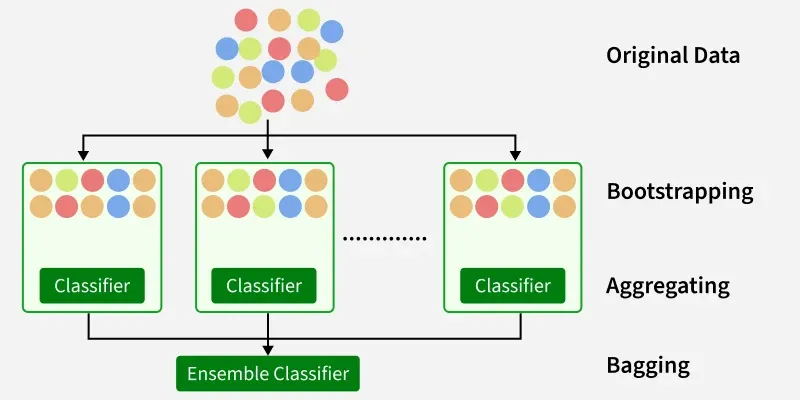

## Hyperparameter Tuning

1. Hyperopt 

Hyperopt adalah sebuah library Python yang digunakan untuk mengoptimasi fungsi.
Dalam machine learning, fungsi yang dioptimasi adalah fungsi evaluasi model.

2. n_estimators

Default: 10
Jumlah base estimators (model) yang akan dilatih.
Semakin banyak → hasil biasanya lebih stabil, tapi training lebih lama.

3. max_samples

Default: 1.0
Jumlah sampel yang diambil dari dataset untuk melatih tiap base estimator.

4. max_features

Default: 1.0
Jumlah fitur yang dipilih secara acak untuk setiap base estimator.
Bisa berupa float (proporsi) atau int (jumlah fitur).
Mengurangi korelasi antar base estimator → bisa membantu performa.
Bisa berupa:
float (0 < x ≤ 1) → proporsi data
int → jumlah absolut sampel

5. estimator

default: DecisionTreeClasifier()<br>
menentukan base learner yang akan dijalankan



In [30]:
#Define Sampler karena imbalance
ros = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
nearmiss = NearMiss()

In [31]:

# ====== 1. Definisikan search space (gabung space + space_resample)
space = {"estimator": hp.choice("estimator", ["logreg", "knn", "tree", "rf"]),
    "n_estimators": scope.int(hp.quniform("n_estimators", 10, 100, 1)),
    "max_samples": hp.uniform("max_samples", 0.5, 1.0),
    "max_features": hp.uniform("max_features", 0.5, 1.0),
    "resampling": hp.choice("resampling", ["ros", "smote", "rus", "nearmiss"])
}

# ====== 2. Definisikan fungsi objektif
def objective(params):

       # Tentukan estimator jadi object
    if params["estimator"] == "logreg":
        base_estimator = LogisticRegression(max_iter=500)
    elif params["estimator"] == "knn":
        base_estimator = KNeighborsClassifier()
    elif params["estimator"] == "tree":
        base_estimator = DecisionTreeClassifier()
    elif params["estimator"] == "rf":
        base_estimator = RandomForestClassifier()

    # Tentukan metode resampling
    if params["resampling"] == "ros":
        sampler = RandomOverSampler(random_state=0)
    elif params["resampling"] == "smote":
        sampler = SMOTE(random_state=0)
    elif params["resampling"] == "rus":
        sampler = RandomUnderSampler(random_state=0)
    elif params["resampling"] == "nearmiss":
        sampler = NearMiss()
    

    # Definisikan model
    model = BaggingClassifier(
        n_estimators=int(params["n_estimators"]),
        max_samples=params["max_samples"],
        max_features=params["max_features"],
        random_state=0
    )

    # Buat pipeline, tambahkan step resampling hanya jika ada
    if sampler:
        model_pipe = Pipeline([
            ("preprocessing", preprocess_transformer),
            ("resampling", sampler),
            ("model", model)
        ])
    

    # Cross-validation
    try:
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        model_cv = cross_val_score(
            model_pipe,
            X_train,
            y_train,
            cv=skfold,
            scoring=f2_scorer 
        )
        return {"loss": 1 - model_cv.mean(), "status": STATUS_OK}
    except Exception as e:
        return {"loss": np.inf, "status": STATUS_OK}

# ====== 3. Jalankan Hyperopt
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

print("Best params:", best)
best_params = space_eval(space, best)


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [20:43<00:00, 12.43s/trial, best loss: 0.2187223150421338]
Best params: {'estimator': 3, 'max_features': 0.9647344830163357, 'max_samples': 0.8659415919460618, 'n_estimators': 37.0, 'resampling': 2}


Metode sampling terbaik:

In [32]:
best_params.pop('resampling')

'rus'

Parameter terbaik:

In [33]:
best_params

{'estimator': 'rf',
 'max_features': 0.9647344830163357,
 'max_samples': 0.8659415919460618,
 'n_estimators': 37}

define estimator

In [34]:
best_params['estimator'] = RandomForestClassifier(random_state=0)

## Predict to Test

Setelah mendapatkan nilai parameter terbaik, maka selanjutnya akan dibandingkan nilai F2 saat sebelum tuning dan setelah tuning.

Nilai F2 sebelum tuning:

In [35]:

pipe_model = Pipeline([
    ('prep', preprocess_transformer), 
    ('model', BaggingClassifier(random_state=0))])

pipe_model.fit(X_train, y_train)

y_pred_benchmark = pipe_model.predict(X_test)
fbeta_score(y_test, y_pred_benchmark, beta=2)

0.7037811638946984

Nilai F2 setelah tuning:

In [36]:

best_model_pipe = Pipeline([
    ('prep', preprocess_transformer),
    ('resampling', rus),  
    ('model', BaggingClassifier(random_state=0, **best_params))
])

best_model_pipe.fit(X_train, y_train)
y_best_pipe = best_model_pipe.predict(X_test)
fbeta_score(y_test, y_best_pipe, beta=2)

0.7821421848528581

Nilai F2 sebelum tuning ialah 0.7077557755775578

Nilai F2 setelah tuning ialah 0.7813040062843676

Cek nilai F2 pada train dan test sebelum dan sesudah tuning

Nilai F2 pada train dan test sebelum tuning:

In [37]:
# cek train dan test f2 base model
pipe_base = pipe_model

pipe_base.fit(X_train, y_train)

y_train_base = pipe_base.predict(X_train)
y_test_base = pipe_base.predict(X_test)

# Hitung F2 train dan test
f2_train_base = fbeta_score(y_train, y_train_base, beta=2)
f2_test_base = fbeta_score(y_test, y_test_base, beta=2)

print(f"Train F2 (base Model): {f2_train_base:.4f}")
print(f"Test F2 (base Model): {f2_test_base:.4f}")

Train F2 (base Model): 0.7337
Test F2 (base Model): 0.7038


Nilai F2 pada train dan test sesudah tuning:

In [38]:
# cek train dan test f2 tuned model
pipe_tuned = best_model_pipe

pipe_tuned.fit(X_train, y_train)

y_train_tuned = pipe_tuned.predict(X_train)
y_test_tuned = pipe_tuned.predict(X_test)

# Hitung F2 train dan test
f2_train_tuned = fbeta_score(y_train, y_train_tuned, beta=2)
f2_test_tuned = fbeta_score(y_test, y_test_tuned, beta=2)

print(f"Train F2 (tuned Model): {f2_train_tuned:.4f}")
print(f"Test F2 (tuned Model): {f2_test_tuned:.4f}")

Train F2 (tuned Model): 0.8058
Test F2 (tuned Model): 0.7821


ada peningkatan nilai dan penurunan over fitting, save terlebih dahulu model yang sudah dirancang

In [75]:
joblib.dump(best_model_pipe, "hotel_booking_prediction_model.sav", compress=9)

['hotel_booking_prediction_model.sav']

## Confusion Matrix

Terakhir akan ditampilkan Confusion Matrix untuk menghitung biaya.

Confusion Matrix adalah tabel pengukuran kinerja yang merangkum hasil prediksi dari model klasifikasi dengan menunjukkan jumlah True Positive, True Negative, False Positive, dan False Negative.

### a. Confusion Matrix Model Sebelum Tuning

In [41]:
conf_matrix_before = confusion_matrix(y_test, y_test_base)
conf_matrix_after = confusion_matrix(y_test, y_test_tuned)

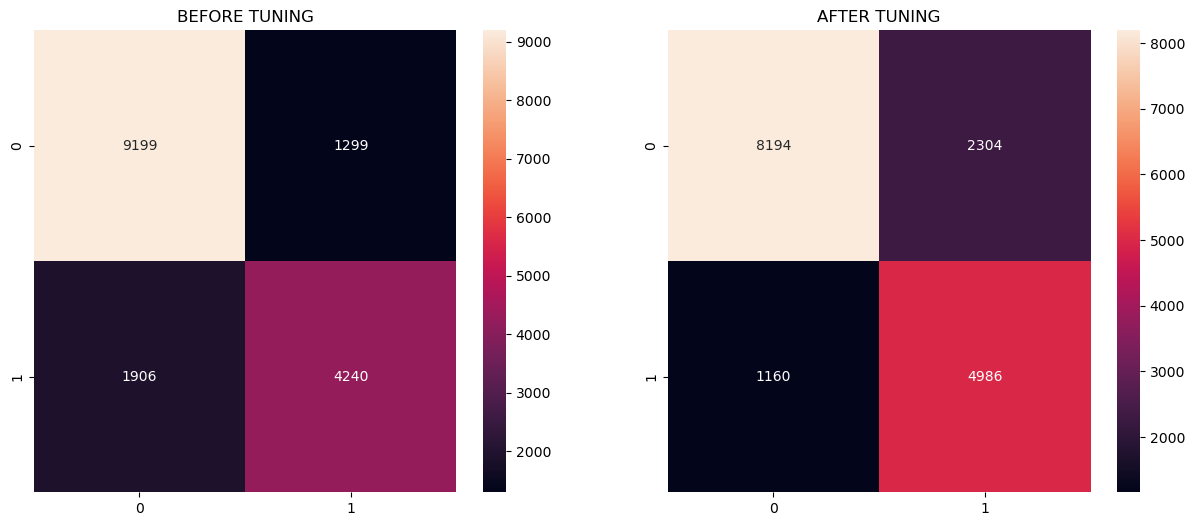

In [58]:
figure, axes = plt.subplots(ncols=2, figsize=(15,6))
sns.heatmap(conf_matrix_before, annot=True, fmt='g',ax=axes[0])
axes[0].set_title("BEFORE TUNING")
sns.heatmap(conf_matrix_after, annot=True, fmt='g', ax=axes[1])
axes[1].set_title("AFTER TUNING")

plt.show()

## Biaya Kerugian

Berdasarkan Confusion Matrix, maka akan dilakukan perhitungan kerugian apabila menggunakan model sebelum dituning dan setelah dituning.

In [43]:
def summarize_loss(confusion_matrix, fp_cost, fn_cost, tp_cost, tn_cost):
    tn, fp = confusion_matrix[0]
    fn, tp = confusion_matrix[1]
    
    total_samples = tn + fp + fn + tp
    total_fp_benefit = fp * fp_cost
    total_fn_cost = fn * fn_cost
    total_tp_benefit = tp * tp_cost
    total_tn_benefit = tn * tn_cost
    
    total_cost = total_fp_benefit + total_fn_cost + total_tp_benefit + total_tn_benefit
    
    summary = f"""
    ---Impact Summary---

        Total Samples: {total_samples}
        Total False Positive Benefit: ${total_fp_benefit:,.2f}
        Total False Negative Cost: ${total_fn_cost:,.2f}
        Total True Positive Benefit: ${total_tp_benefit:,.2f}
        Total True Negative Benefit: ${total_tn_benefit:,.2f}
        Total Benefit: ${total_cost:,.2f}
        
    ---------------
    """
    
    return summary

### a. Biaya Kerugian Model Sebelum Tuning

In [44]:
print(summarize_loss(confusion_matrix(y_test, y_pred_benchmark), tp_cost=tp_cost, tn_cost=tn_cost, fn_cost=fn_cost, fp_cost=fp_cost))


    ---Impact Summary---

        Total Samples: 16644
        Total False Positive Benefit: $38,970.00
        Total False Negative Cost: $-70,522.00
        Total True Positive Benefit: $42,400.00
        Total True Negative Benefit: $321,965.00
        Total Benefit: $332,813.00

    ---------------
    


### b. Biaya Kerugian Model Setelah Tuning

In [45]:
print(summarize_loss(confusion_matrix(y_test, y_best_pipe), tp_cost=tp_cost, tn_cost=tn_cost, fn_cost=fn_cost, fp_cost=fp_cost))


    ---Impact Summary---

        Total Samples: 16644
        Total False Positive Benefit: $69,120.00
        Total False Negative Cost: $-42,920.00
        Total True Positive Benefit: $49,860.00
        Total True Negative Benefit: $286,790.00
        Total Benefit: $362,850.00

    ---------------
    


Dapat dilakukan perhitungan:
- Penambahan Profit = €362,761.00 - €332,813.00 = €30,037.00
- Persentase Penambahan = (30,037/332,813) × 100 = 9%

Dengan menggunakan model setelah dituning, maka akan menambah profit sebesar€30,037.00 atau 9%.

## Limitasi Model

Model yang diterapkan memiliki beberapa keterbatasan, yaitu: 
- Model ini bergantung pada historical data, yang mungkin tidak dapat menyesuaikan dengan tren baru atau kejadian tak terduga. Bias dalam data training dapat terbawa ke dalam predictions, yang berpotensi menghasilkan hasil yang tidak adil. Model ini juga terbatas pada ranges yang didefinisikan dalam dataset dan kurang reliable ketika kombinasi fitur tidak well-represented dalam data training.
- Model ini mengasumsikan konsistensi data input; kinerjanya dapat menurun jika data distributions berubah dari waktu ke waktu. Complex architectures juga dapat membatasi interpretability, sehingga mengurangi trust dan transparency. Scalability dan latency juga dapat terpengaruh oleh resource constraints dalam production.
- Regular monitoring dan retraining sangat penting untuk menjaga accuracy dan menyesuaikan dengan perubahan pada data atau context.
- Model Bagging adalah ensemble dari banyak model → sulit untuk memahami kontribusi masing-masing fitur.
- Membuat banyak bootstrap sample dan melatih banyak model memakan:
    - Waktu (training bisa jauh lebih lama dibanding model tunggal)
    - Memori (karena menyimpan banyak model)
- Jika base estimator terlalu kompleks (misalnya decision tree dengan kedalaman sangat besar), walaupun Bagging membantu, overfitting tetap mungkin terjadi terutama pada dataset kecil.

## Conclusion

In [46]:
print('Classification Report Bagging Setelah Tuning: \n', classification_report(y_test, y_best_pipe))

Classification Report Bagging Setelah Tuning: 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83     10498
           1       0.68      0.81      0.74      6146

    accuracy                           0.79     16644
   macro avg       0.78      0.80      0.78     16644
weighted avg       0.81      0.79      0.79     16644



In [47]:
# Asumsi Jumlah Tamu Hotel Suatu Waktu Yang Melakukan Pembatalan dan Tidak
y_test.value_counts()

is_canceled
0    10498
1     6146
Name: count, dtype: int64

Berdasarkan nilai Recall yang telah kita dapatkan, dapat ditarik kesimpulan bahwasannya seandainya model digunakan untuk mengetahui tamu hotel yang akan melakukan pembatalan atau tidak, maka: 
- Dari semua pembatalan yang terjadi, model ini dapat mengidentifikasi dengan benar 81% di antaranya.
- Dari semua pemesanan yang tidak dibatalkan, model ini dapat mengidentifikasi dengan benar 78% di antaranya.

In [48]:
confusion_matrix(y_test, y_best_pipe)

array([[8194, 2304],
       [1160, 4986]], dtype=int64)

Misal pada suatu waktu jumlah tamu hotel sebesar 16,714 orang, maka perhitungan tanpa menggunakan model dan menggunakan model sebagai berikut: <br>

Tanpa model:<br>
- Jika diprediksi bahwasannya semua tamu hotel tidak melakukan pembatalan, maka nantinya akan kehilangan pembatalan yang benar-benar terjadi.
- False Negatives = 6,146 kasus × €37 = -(€227,402)
- True Negative = 10,558 kasus x €35 = €367,430
- Total Pendapatan = €367,430 - €227,402 = 140,028

Dengan model:
- Biaya False Negative:<br>
1,160 kasus × €37 = -(€42,920)
- Pendapatan False Positive:<br>
2,304 kasus × €30 = €69,120
- Pendapatan True Negative:
8,285 kasus x €35 = €286,790
- Pendapatan True Positive:
4,986 kasus x €10 = €49,860
- Total Pendapatan with Model:<br>
€49,860 + €286,790 + €69,120 -€42,920 = €362,850

Maka berdasarkan hasil perhitungan di atas, dengan menggunakan model yang telah dibuat maka Hotel dapat menambah pendapatan lebih dari 2 kali lipat dibandingkan tanpa menggunakan model.

## Recommendation

**Jadi yang butuh perlakuan khusus adalah transaksi customer dengan hasil prediksi negatif (Tidak cancel) karena akan berpotensi menyebabkan kerugian**

**Mitigasi yang dapat dilakukan jika memakai model ini secara Built-In dalam aplikasi ialah:**

**1. Tetapkan biaya Cancel untuk semua transaksi customer dengan hasil prediksi negatif (tidak cancel) untuk minimalisir resiko kerugian dalam setiap transaksi yang terjadi**<br>
**2. Cantumkan biaya lainnya yang tidak dapat dikembalikan jika bookingan dicancel untuk meminimalisir kerugian terhadap transaksi yang diprediksi negatif, jika tidak dicancel biaya tersebut dikembalikan dalam bentuk cashback yang dapat digunakan dalam transaksi berikutnya**



**Semua langkah diatas dijalankan dengan asumsi model ini digunakan dalam prediksi saat pemesanan terjadi (sebelum pembayaran dilakukan) dan semua biaya masuk kedalam totalan yang harus dibayarkan customer**

## Train With All Data


In [49]:
best_model_pipe.fit(X, y)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['deposit_type',
                                                   'customer_type']),
                                                 ('oridinal',
                                                  OrdinalEncoder(cols='reserved_room_type',
                                                                 mapping=[{'col': 'reserved_room_type',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': P     1
H     2
A     3
G     4
L     5
B     6
C     7
D     8
F     9
E    10
dtype: int6...
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object'))])),
                ('resampling', RandomUnderSampler(random_state=0)),
                ('model',
                 BaggingClassifier(estimator=RandomForestClassifier(random_state=0),
                                   max_features=0.9647344830163357,
                                   max_samples=0.8659415919460618,
                                   n_estimators=37, random_state=0))])

## Model Explanation

In [50]:
preprocess_transformer.verbose_feature_names_out = False # override supaya False

In [51]:
X_transform = preprocess_transformer.fit_transform(X, y)
X_transform

,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type,country_0,country_1,country_2,country_3,...,country_7,market_segment_0,market_segment_1,market_segment_2,market_segment_3,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0.0,0.0,0.0,0.0,1.0,3,0,0,0,0,...,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,3,0,0,0,0,...,0,0,0,1,0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,1.0,0.0,3,0,0,0,0,...,1,0,0,1,0,0.0,1.0,0.0,0.0,2.0
3,0.0,0.0,0.0,1.0,0.0,3,0,0,0,0,...,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,3,0,0,0,0,...,1,0,0,1,0,0.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83568,0.0,0.0,0.0,0.0,0.0,3,0,0,0,0,...,1,0,0,1,0,0.0,0.0,0.0,0.0,3.0
83569,0.0,0.0,0.0,1.0,0.0,8,0,0,0,0,...,0,0,0,1,0,0.0,0.0,0.0,0.0,2.0
83570,0.0,0.0,0.0,1.0,0.0,8,0,0,0,0,...,1,0,0,1,0,0.0,1.0,0.0,0.0,3.0
83571,0.0,0.0,0.0,0.0,1.0,3,0,0,0,0,...,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0


In [52]:
feature_names = X_transform.columns
feature_names

Index(['deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reserved_room_type', 'country_0',
       'country_1', 'country_2', 'country_3', 'country_4', 'country_5',
       'country_6', 'country_7', 'market_segment_0', 'market_segment_1',
       'market_segment_2', 'market_segment_3', 'previous_cancellations',
       'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [53]:
bagging_model = best_model_pipe.named_steps["model"]
# Ambil semua model RandomForest dari BaggingClassifier
rf_list = bagging_model.estimators_

# Ambil random_state dari setiap model
random_states = [rf.random_state for rf in rf_list]

# Hitung median random_state
median_state = int(np.median(random_states))

# Cari model yang random_state paling dekat dengan median
closest_idx = np.argmin([abs(rs - median_state) for rs in random_states])
rf = rf_list[closest_idx]

print(f"Random state median: {median_state}")
print(f"Random state terdekat: {rf.random_state}")
print(rf)


Random state median: 974593025
Random state terdekat: 974593025
RandomForestClassifier(random_state=974593025)


In [54]:
# Define explainer -> untuk tree-based (xgboost, rf, etc.) pakai TreeExplainer
explainer_shap = shap.TreeExplainer(
    model = rf,
    data = X_transform
)

# Hitung shap value untuk tiap baris di data X_transform
shap_values = explainer_shap.shap_values(X_transform)

100%|===================| 166371/166438 [15:43<00:00]        

Shape shap_values_pos: (83219, 23)


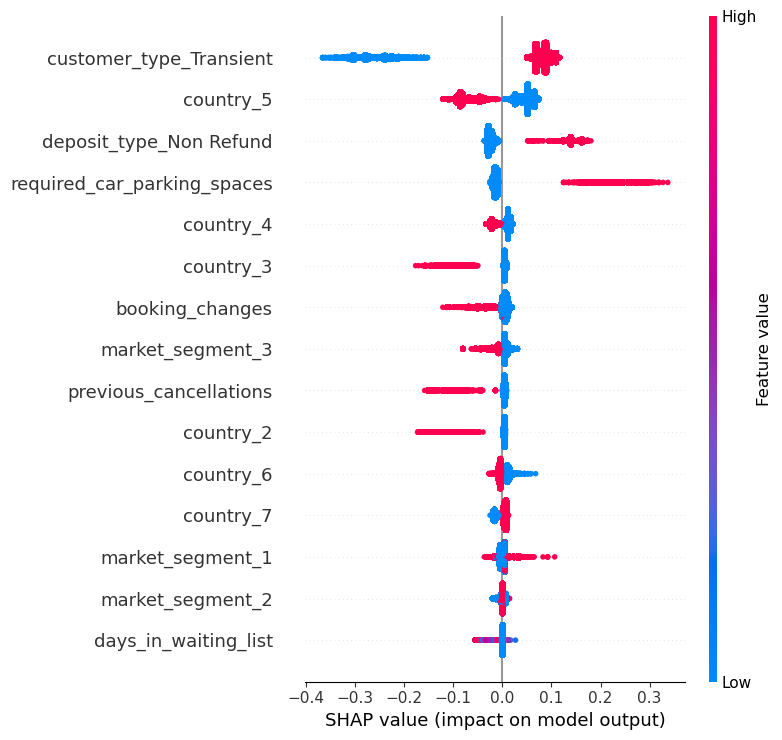

In [72]:
# Ambil SHAP values untuk kelas positif
shap_values_pos = shap_values[:, :, 1]  # ambil hanya untuk class 1

print("Shape shap_values_pos:", shap_values_pos.shape)  # harus (83219, 23)

# Plot lebih rapi
import shap
shap.summary_plot(
    shap_values_pos,
    X_transform,
    feature_names=feature_names,
    plot_type="dot",  # bisa "violin" kalau mau lebih smooth
    max_display=15,   # tampilkan 15 fitur teratas
    show=True
)


| **Fitur**                                  | **Interpretasi SHAP**                                                                                                              | **Insight & Masukan**                                                                                                                                 |
| ------------------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| **customer\_type\_Transient**              | Nilai **tinggi** (merah) → menurunkan peluang booking (negatif SHAP). Nilai **rendah** (biru) → sedikit menaikkan peluang booking. | Customer transient cenderung **tidak melakukan deposit**. <br>💡 **Masukan:** perlu strategi promo atau fleksibilitas harga untuk transient customer. |
| **country\_5**                             | Pelanggan dari `country_5` (mungkin negara spesifik) **meningkatkan** peluang booking (positif SHAP).                              | 💡 **Masukan:** fokuskan kampanye marketing di negara ini karena konversinya tinggi.                                                                  |
| **deposit\_type\_Non Refund**              | Nilai 1 (Non Refund) → mendorong prediksi **positif** (booking terkonfirmasi).                                                     | 💡 **Masukan:** menawarkan opsi non-refundable bisa meningkatkan kepastian booking.                                                                   |
| **required\_car\_parking\_spaces**         | Semakin banyak parking spaces yang diminta → mendorong prediksi positif.                                                           | 💡 **Masukan:** pelanggan yang butuh parkir lebih cenderung serius booking → bisa upsell fasilitas parkir / paket tambahan.                           |
| **country\_4**                             | Seperti `country_5`, negara ini berkontribusi positif.                                                                             | 💡 **Masukan:** strategi marketing juga bisa fokus di negara ini.                                                                                     |
| **country\_3**                             | Kontribusi positif juga (mirip country\_4, country\_5).                                                                            | 💡 **Masukan:** negara ini bisa jadi market yang potensial.                                                                                           |
| **booking\_changes**                       | Semakin sering customer mengubah booking → cenderung menaikkan peluang final booking positif.                                      | 💡 **Masukan:** jangan penalize terlalu keras pelanggan yang sering mengubah booking.                                                                 |
| **market\_segment\_3**                     | Pelanggan dari segmen ini punya SHAP positif.                                                                                      | 💡 **Masukan:** segmen ini potensial → pertahankan atau tingkatkan engagement.                                                                        |
| **previous\_cancellations**                | Nilai tinggi (sering cancel) → cenderung menurunkan peluang booking (negatif SHAP).                                                | 💡 **Masukan:** bisa diberi deposit lebih tinggi / kebijakan khusus untuk mengurangi risiko pembatalan.                                               |
| **country\_2, country\_6**                 | Negara ini memberi efek positif (mirip country\_5).                                                                                | 💡 **Masukan:** prioritas marketing tetap bagus di negara ini.                                                                                        |
| **country\_7**                             | Nilai tinggi → sedikit menurunkan peluang booking.                                                                                 | 💡 **Masukan:** mungkin perlu analisis lebih lanjut (kenapa negara ini banyak yang cancel?).                                                          |
| **market\_segment\_1, market\_segment\_2** | Nilai ini memiliki SHAP yang cenderung negatif → segmen ini kurang menghasilkan booking.                                           | 💡 **Masukan:** evaluasi strategi marketing di segmen ini atau ganti channel distribusi.                                                              |
| **days\_in\_waiting\_list**                | Semakin lama menunggu → menurunkan peluang booking (negatif SHAP).                                                                 | 💡 **Masukan:** kurangi waiting list time, beri promo fast-track untuk konversi lebih tinggi.                                                         |


🧠 Kesimpulan Utama

1. Customer Type & Deposit Type adalah faktor paling kuat.

2. Negara asal customer penting → ada negara yang meningkatkan peluang booking (country_3,4,5) dan ada yang menurunkan.

3. Behavioral features (booking_changes, previous_cancellations) memberi insight tentang perilaku pelanggan.

4. Operational insight: mengurangi waiting list dapat menaikkan konversi.

## Streamlit data preparation

Mencari tau setiap unique values dalam setiap kolom

In [98]:
pd.set_option('display.max_colwidth', None)


cat_cols = X.select_dtypes(exclude='number').columns

unique_values_df = pd.DataFrame({
    'column': cat_cols,
    'unique_values': [X[col].unique().tolist() for col in cat_cols]
})

unique_values_df

,column,unique_values
0,country,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, SVK, ...]"
1,market_segment,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,deposit_type,"[No Deposit, Non Refund, Refundable]"
3,customer_type,"[Transient-Party, Transient, Contract, Group]"
4,reserved_room_type,"[A, E, D, F, B, G, C, H, L, P]"


In [108]:
pd.set_option('display.max_colwidth', None)


num_cols = X.select_dtypes(include='number').columns

unique_values_df = pd.DataFrame({
    'column': num_cols,
    'unique_values': [X[col].unique().tolist() for col in num_cols]
})

unique_values_df

,column,unique_values
0,previous_cancellations,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19, 5, 21]"
1,booking_changes,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12, 14, 21, 16, 20, 15]"
2,days_in_waiting_list,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31, 122, 34, 57, 259, 50, 17, 32, 43, 75, 69, 44, 22, 113, 58, 38, 65, 48, 236, 176, 25, 108, 91, 19, 160, 68, 28, 63, 35, 42, 59, 24, 8, 183, 187, 21, 111, 56, 98, 101, 15, 16, 47, 93, 45, 14, 70, 10, 49, 178, 99, 60, 40, 85, 223, 6, 33, 391, 20, 1, 41, 147, 55, 80, 379, 150, 61, 330, 174, 107, 96, 18, 62, 13, 30, 120, 27, 207, 71, 2, 76, 125, 5, 9, 224, 53, 83, 84, 12, ...]"
3,required_car_parking_spaces,"[0, 1, 2]"
4,total_of_special_requests,"[0, 2, 1, 3, 4, 5]"
